In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab as plot
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = 50
pd.options.display.max_rows = 80

In [32]:
df_train = pd.read_csv('WORK_bank_data_train.csv', sep=';')
df_train.head()

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,02,Midlands,3.0,53,Platinum,No,Yes,Yes,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
1,1200000002,47.0,No,middle,34,Midlands,2.0,51,Gold,No,Yes,Yes,No,2033.14,2969.30,4202.63,5,14,977.80,U,No,No
2,1200000003,45.0,No,middle,17,North,6.0,50,Silver,No,Yes,Yes,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,49,Midlands,12.0,52,Platinum,Yes,Yes,Yes,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,19,South East,8.0,52,Silver,Yes,Yes,Yes,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No


In [33]:
df_test = pd.read_csv('WORK_WORK_BANK_DATA_test_sample.csv', sep=';')
df_test.head()

,ID,Age,Ind_House_hold,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender
0,1200000027,50.0,No,middle,22,South East,5.0,47,Tin,Yes,No,2062.32,2978.92,4054.13,7,17,950.45,M
1,1200000040,34.0,No,middle,47,South East,5.0,54,Tin,No,No,2000.73,3111.23,4265.02,5,17,982.29,F
2,1200000041,NaN,Yes,unknown,14,South East,28.0,52,Gold,Yes,No,1991.05,2990.26,4193.14,9,33,909.27,F
3,1200000071,61.0,No,senior,23,Midlands,3.0,54,Silver,Yes,No,2094.12,3089.97,4167.11,5,17,933.91,F
4,1200000080,44.0,No,middle,51,North,8.0,43,Silver,Yes,No,2034.41,2972.27,4165.87,5,17,917.13,F


In [34]:
def encoder(data, columns):
    for column in columns:
        tmp = pd.get_dummies(data[column], prefix=column)
        data = data.drop(columns=[column])
        data = data.join(tmp)
    return data

def code(data, columns):
    for column in columns:
        data[column] = 1 * (data[column] == 'Yes')
    return data

def data_preparation(df, is_train=True):
    df['Age'].fillna(round(df['Age'].mean(), 0), inplace=True)
    df['Lifetime'].fillna(round(df['Lifetime'].mean(), 0), inplace=True)
    
    if not is_train:
        df.rename(columns = {'Ind_House_hold' : 'Ind_Household'}, inplace = True)
    
    columns_to_delete_train = ['Ind_email', 'Ind_phone']

    columns_to_delete = ["Ind_Household", "District", "Ind_deposit", "Ind_salary",
                      "trans_6_month", "trans_9_month", "trans_12_month", "amont_trans",
                      "trans_3_month"] #IV < 0.01

    if is_train:
        columns_to_label_encoding = ['Target1', 'Target2']
        df = code(df, columns=columns_to_label_encoding)
        df.drop(columns=columns_to_delete_train, inplace=True)

    df.drop(columns=columns_to_delete, inplace=True)
    
    columns_to_encoder = ['Age_group', 'Region', 'Segment', 'Gender']
    df = encoder(df, columns=columns_to_encoder)

    df.drop(columns=["Region_Unknown", "Gender_U", "Age_group_unknown"], inplace=True)
    
    return df

In [35]:
df_train = data_preparation(df_train)
df_test = data_preparation(df_test, False)

Делим данные на тест и на трейн

In [36]:
y1 = df_train.loc[:, ['Target1']] #колонка таргета 1
y2 = df_train.loc[:, ['Target2']] #колонка таргета 2
x = df_train.drop(columns = ['Target1', 'Target2']) #фичи

In [37]:
from sklearn.model_selection import train_test_split
x1 = x.copy()
x2 = x.copy()
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=1)

### Модели для Таргета 1

#### Линейная классификация 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#нормируем данные
scaler = StandardScaler()
x1_train_1 = scaler.fit_transform(x1_train)
x1_test_1 = scaler.transform(x1_test)

clf_lr = LinearRegression()
clf_lr.fit(x1_train_1, y1_train)

y1_pred_test = clf_lr.predict(x1_test_1)
y1_pred_train = clf_lr.predict(x1_train_1)

In [ ]:
y1_pred_train.shape

(689833, 1)

In [ ]:
y1_pred_test.shape

(295644, 1)

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy for train: ", accuracy_score(y1_train, y1_pred_train > 0.5))
print("accuracy for test: ", accuracy_score(y1_test, y1_pred_test > 0.5))

accuracy for train:  0.7966667294838026
accuracy for test:  0.7979461785119941


In [ ]:
print("f1 score for train: ", f1_score(y1_train, y1_pred_train > 0.5))
print("f1 score for train: ", f1_score(y1_test, y1_pred_test > 0.5))
print("roc_auc_score for train: ", roc_auc_score(y1_train, y1_pred_train))
print("roc_auc_score for train: ", roc_auc_score(y1_test, y1_pred_test))

f1 score for train:  0.4663729675028723
f1 score for train:  0.46934351958781206
roc_auc_score for train:  0.8185840544690578
roc_auc_score for train:  0.8205242104368542


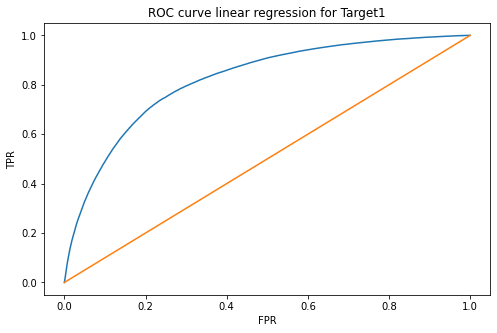

In [ ]:
fpr1, tpr1, _ = roc_curve(y1_test, y1_pred_test, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.plot(fpr1, fpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve linear regression for Target1')
plt.show()

#### Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
tree = DecisionTreeClassifier()
parameters = {
    'criterion'         : ['gini', 'entropy', 'log_loss'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : [2, 4, 6, 7, 8, 10, 12],
    'min_samples_leaf'  : [1, 3, 5, 7],
    'min_samples_split' : [1, 2, 4, 6, 8],
    'max_features'      : ['log2', 'sqrt', None]
}

tuning_model1 = RandomizedSearchCV(
    tree, parameters, n_iter=100,
    cv=5, verbose=3, random_state=42
)

tuning_model1.fit(x1_train, y1_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.816 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.804 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.792 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.805 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.769 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.826 total time=   0.5s
[CV 2/5] END criterion=entropy, max_dept

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a floa

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 6, 7, 8, 10, 12],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [1, 2, 4, 6, 8],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=3)

In [ ]:
tuning_model1.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'splitter': 'best'}

In [ ]:
tuning_model1.best_score_

0.8553316554612623

In [ ]:
tree1 = DecisionTreeClassifier(
    splitter = 'best',
    min_samples_split = 8,
    min_samples_leaf = 1,
    max_features = None,
    max_depth = 12,
    criterion = 'gini'
)
tree1.fit(x1_train, y1_train)

y1_train_pred = tree1.predict(x1_train)
y1_test_pred = tree1.predict(x1_test)

preds_test_tree1 = tree1.predict_proba(x1_test)[:, 1]
preds_train_tree1 = tree1.predict_proba(x1_train)[:, 1]

In [ ]:
print('f1_test:', f1_score(y1_test, y1_test_pred))
print('f1_test:', f1_score(y1_train, y1_train_pred))
print('roc_auc_test:', roc_auc_score(y1_test, preds_test_tree1))
print('roc_auc_train:', roc_auc_score(y1_train, preds_train_tree1))

f1_test: 0.6700345322624452
f1_test: 0.6773644541697058
roc_auc_test: 0.8965948834547562
roc_auc_train: 0.9028339732357162


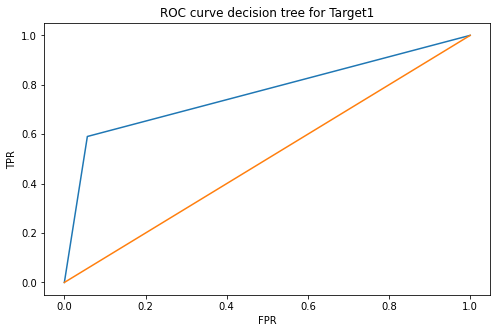

In [ ]:
fpr1, tpr1, _ = roc_curve(y1_test, y1_test_pred, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1, tpr1)
plt.plot(fpr1, fpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve decision tree for Target1')
plt.show()

#### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()

In [ ]:
parametrs = dict(n_estimators = [20, 50, 100, 200],
                   max_depth = [3, 5, 7, 10, None])

clf_rf = RandomizedSearchCV(rf, parametrs, verbose=3, random_state=321)

search_rf_model = clf_rf.fit(x1_train, y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ......max_depth=3, n_estimators=20;, score=0.818 total time=  10.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ......max_depth=3, n_estimators=20;, score=0.821 total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=3, n_estimators=20;, score=0.821 total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ......max_depth=3, n_estimators=20;, score=0.773 total time=   6.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=3, n_estimators=20;, score=0.823 total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=7, n_estimators=200;, score=0.844 total time= 1.4min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=7, n_estimators=200;, score=0.843 total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=7, n_estimators=200;, score=0.844 total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=7, n_estimators=200;, score=0.843 total time= 1.4min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=7, n_estimators=200;, score=0.848 total time= 1.4min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ..max_depth=None, n_estimators=200;, score=0.890 total time= 3.5min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ..max_depth=None, n_estimators=200;, score=0.893 total time= 3.4min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ..max_depth=None, n_estimators=200;, score=0.891 total time= 3.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ..max_depth=None, n_estimators=200;, score=0.892 total time= 3.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ..max_depth=None, n_estimators=200;, score=0.892 total time= 3.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.833 total time=  34.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=5, n_estimators=100;, score=0.833 total time=  36.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=5, n_estimators=100;, score=0.835 total time=  36.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=5, n_estimators=100;, score=0.834 total time=  35.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=5, n_estimators=100;, score=0.834 total time=  35.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=5, n_estimators=200;, score=0.832 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=5, n_estimators=200;, score=0.834 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=5, n_estimators=200;, score=0.835 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=5, n_estimators=200;, score=0.833 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=5, n_estimators=200;, score=0.835 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.853 total time=  30.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.853 total time=  30.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.854 total time=  31.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.854 total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.855 total time=  29.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.823 total time=  24.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.823 total time=  24.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.824 total time=  24.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.824 total time=  25.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.824 total time=  24.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ....max_depth=10, n_estimators=200;, score=0.853 total time= 2.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ....max_depth=10, n_estimators=200;, score=0.854 total time= 2.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ....max_depth=10, n_estimators=200;, score=0.853 total time= 2.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ....max_depth=10, n_estimators=200;, score=0.854 total time= 2.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ....max_depth=10, n_estimators=200;, score=0.855 total time= 1.9min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.820 total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.823 total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.824 total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.822 total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=3, n_estimators=50;, score=0.823 total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=10, n_estimators=20;, score=0.853 total time=  11.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=10, n_estimators=20;, score=0.852 total time=  11.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=10, n_estimators=20;, score=0.852 total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=10, n_estimators=20;, score=0.853 total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=10, n_estimators=20;, score=0.856 total time=  11.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
search_rf_model.cv_results_

{'mean_fit_time': array([  7.38956275,  84.44046125, 200.21221972,  34.58343425,
         69.55637197,  29.75319533,  23.56049857, 114.96273608,
         11.14586992,  10.87011108]),
 'mean_score_time': array([ 0.2508039 ,  2.55351233, 12.81892633,  1.09189887,  2.17282853,
         0.89038296,  0.89479203,  3.53754582,  0.45728569,  0.36845303]),
 'mean_test_score': array([0.81118905, 0.84422752, 0.89157086, 0.83386124, 0.83369598,
        0.8538168 , 0.82345147, 0.85388493, 0.82234831, 0.85323695]),
 'param_max_depth': masked_array(data=[3, 7, None, 5, 5, 10, 3, 10, 3, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[20, 200, 200, 100, 200, 50, 100, 200, 50, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 '

In [ ]:
search_rf_model.best_params_

{'max_depth': None, 'n_estimators': 200}

In [ ]:
search_rf_model.best_score_

0.8915708596947193

In [ ]:
rf1 = RandomForestClassifier(n_estimators = 200, 
                                max_depth = None,
                                random_state = 321)
rf1 = rf1.fit(x1_train, y1_train)

y1_train_pred_rf = rf1.predict(x1_train)
y1_test_pred_rf = rf1.predict(x1_test)

prob1_train_rf = rf1.predict_proba(x1_train)[:, 1]
prob1_test_rf = rf1.predict_proba(x1_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
print("f1 score for train: ", f1_score(y1_train, y1_train_pred_rf))
print("f1 score for test: ", f1_score(y1_test, y1_test_pred_rf))
print("roc_auc_score for train: ", roc_auc_score(y1_train, prob1_train_rf))
print("roc_auc_score for test: ", roc_auc_score(y1_test, prob1_test_rf))

f1 score for train:  0.9999853305754814
f1 score for test:  0.7750787710987577
roc_auc_score for train:  0.9999999991527282
roc_auc_score for test:  0.9397811640275742


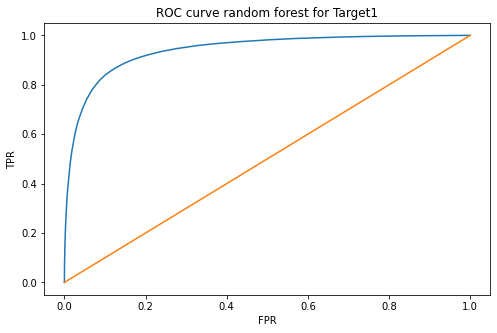

In [ ]:
fpr1_rf, tpr1_rf, _ = roc_curve(y1_test, prob1_test_rf, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr1_rf, tpr1_rf)
plt.plot(fpr1_rf, fpr1_rf)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve random forest for Target1')
plt.show()

#### XGboost

In [8]:
pip install xgboost

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

Алгоритм подбора гиперпараметров следующий:

Выбираем относительно большой learning_rate (η ∈ [0.05, 0.3]), подбираем оптимальное число деревьев для выбранного η

Настраиваем параметры деревьев, начиная с самых значимых (max_depth, min_child_weight, gamma, subsample, colsample_bytree)

Настраиваем регуляризации ( λ , α )

Уменьшаем learning_rate, пропорционально увеличиваем число деревьев

In [39]:
xgb1 = XGBClassifier(
        learning_rate=0.1,
        n_estimators=150,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

Создадим функцию для моделирования и кросс-валидации

Эта функция делает следующее:

обучает модель

вычисляет accuracy на тренировочной выборке

вычисляет AUC на тренировочной выборке

вычисляет AUC на тестовой выборке

обновляет n_estimators с помощью встроенной в пакет xgboost функции cv

строит диаграмму Feature Importance

In [40]:
from sklearn import metrics

def modelfit(alg, X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        xgtest = xgb.DMatrix(X_test.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
        
    #Print model report:
    print("F1-score : %.4g" % f1_score(y_train.values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(y_train, dtrain_predprob))
    
    #Predict on testing data:
    dtest_predprob = alg.predict_proba(X_test)[:,1]
    print('AUC Score (Test): %f' % roc_auc_score(y_test, dtest_predprob))
                
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


F1-score : 0.7036
AUC Score (Train): 0.910847
AUC Score (Test): 0.909637


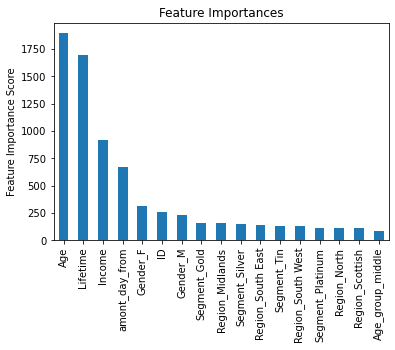

In [41]:
modelfit(xgb1, x1_train, x1_test, y1_train, y1_test)

Перебираем max_depth и min_child_weight по сетке.

In [42]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150,
                                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(x1_train, y1_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
     

In [43]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 5}, 0.9263144892536118)

Уточняем предсказание

In [44]:
param_test2 = {
    'max_depth':[8, 9, 10],
    'min_child_weight':[4, 5, 6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, 
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(x1_train, y1_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
     

In [45]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 10, 'min_child_weight': 4}, 0.9306288178812782)

Мы подобрали max_depth и min_child_weight - дальше будем использовать подобранные значения параметров. Подберем по сетке параметр gamma на отрезке от 0 до 1.

In [46]:
param_test3 = {
    'gamma': np.arange(0.0, 1.1, 0.1)
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=gsearch2.best_params_['max_depth'],
                         min_child_weight = gsearch2.best_params_['min_child_weight'], objective='binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                         param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(x1_train, y1_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
          

In [47]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.4}, 0.9314098350752584)

Подберем по сетке параметры subsample и colsample_bytree. Используем значения этих параметров: [0.6,0.7,0.8,0.9,1.]

In [48]:
param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
} 

gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=gsearch2.best_params_['max_depth'],
                                                   min_child_weight = gsearch2.best_params_['min_child_weight'], gamma = gsearch3.best_params_['gamma'], objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                         param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(x1_train, y1_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0.4, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
           

In [49]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.9}, 0.9306330262204068)

Подберем параметр регуляризации reg_alpha. Попробуем [1e-5, 1e-2, 0.1, 1, 100]

In [52]:
param_test5 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
} 
 
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=gsearch2.best_params_['max_depth'],
                                                   min_child_weight = gsearch2.best_params_['min_child_weight'], gamma = gsearch3.best_params_['gamma'], objective='binary:logistic', nthread=4, scale_pos_weight=1,seed=27,
                                                  subsample = gsearch4.best_params_['subsample'], colsample_bytree = gsearch4.best_params_['colsample_bytree']),
                         param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(x1_train, y1_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0.4, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
            

In [53]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 0.1}, 0.931499993527669)

Запустим обучение и предсказание на найденных параметрах и посмотрим на качество.

D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


F1-score : 0.7642
AUC Score (Train): 0.940750
AUC Score (Test): 0.932679


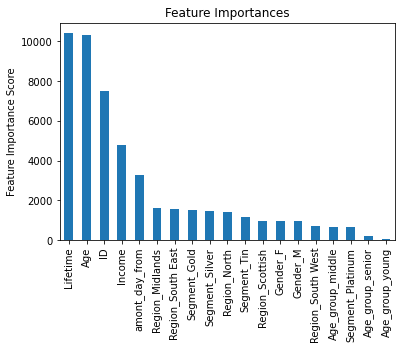

In [54]:
xgb3 = XGBClassifier(
        learning_rate=0.1,     
        n_estimators=150,   
        max_depth=gsearch2.best_params_['max_depth'],
        min_child_weight=gsearch2.best_params_['min_child_weight'],
        gamma=gsearch3.best_params_['gamma'],
        subsample=gsearch4.best_params_['subsample'],
        colsample_bytree=gsearch4.best_params_['colsample_bytree'],
        reg_alpha=gsearch5.best_params_['reg_alpha'],
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb3, x1_train, x1_test, y1_train, y1_test)

Уменьшим learning_rate до 0.01 и пропорционально увеличим число деревьев. Все подобранные параметры остаются такими же.

D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


F1-score : 0.7611
AUC Score (Train): 0.939089
AUC Score (Test): 0.931239


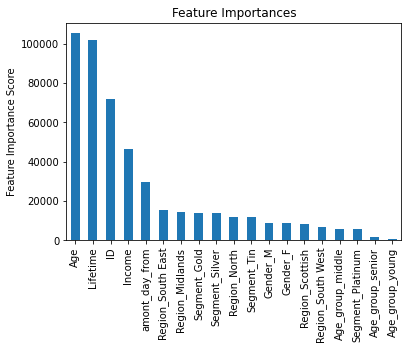

In [55]:
xgb3 = XGBClassifier(
        learning_rate=0.01,     
        n_estimators=1500,   
        max_depth=gsearch2.best_params_['max_depth'],
        min_child_weight=gsearch2.best_params_['min_child_weight'],
        gamma=gsearch3.best_params_['gamma'],
        subsample=gsearch4.best_params_['subsample'],
        colsample_bytree=gsearch4.best_params_['colsample_bytree'],
        reg_alpha=gsearch5.best_params_['reg_alpha'],
        objective='binary:logistic',  
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb3, x1_train, x1_test, y1_train, y1_test)

### Модели для Таргета 2

#### Линейная классификация

In [ ]:
#нормируем данные
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x2_train_1 = scaler.fit_transform(x2_train)
x2_test_1 = scaler.transform(x2_test)

clf_lr = LinearRegression()
clf_lr.fit(x2_train_1, y2_train)

y2_pred_test = clf_lr.predict(x2_test_1)
y2_pred_train = clf_lr.predict(x2_train_1)

In [ ]:
(y2_pred_test > 0.5).sum()

0

In [ ]:
(y2_train == 0).sum()

Target2    630494
dtype: int64

In [ ]:
(y2_train == 1).sum()

Target2    59339
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

print("accuracy for train: ", accuracy_score(y2_train, y2_pred_train > 0.5))
print("accuracy for test: ", accuracy_score(y2_test, y2_pred_test > 0.5))

accuracy for train:  0.9139806300945301
accuracy for test:  0.9152866285126706


In [ ]:
print("f1 score for train: ", f1_score(y2_train, y2_pred_train > 0.5))
print("f1 score for train: ", f1_score(y2_test, y2_pred_test > 0.5))
print("roc_auc_score for train: ", roc_auc_score(y2_train, y2_pred_train))
print("roc_auc_score for train: ", roc_auc_score(y2_test, y2_pred_test))

f1 score for train:  0.0
f1 score for train:  0.0
roc_auc_score for train:  0.7463878210797943
roc_auc_score for train:  0.7478783705389117


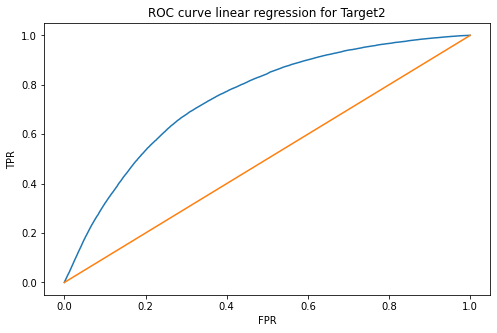

In [ ]:
fpr2, tpr2, _ = roc_curve(y2_test, y2_pred_test, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr2, tpr2)
plt.plot(fpr2, fpr2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve linear regression for Target2')
plt.show()

#### Деревой решений

In [ ]:
tree = DecisionTreeClassifier()
parameters = {
    'criterion'         : ['gini', 'entropy', 'log_loss'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : [2, 4, 6, 7, 8, 10, 12],
    'min_samples_leaf'  : [1, 3, 5, 7],
    'min_samples_split' : [1, 2, 4, 6, 8],
    'max_features'      : ['log2', 'sqrt', None]
}

tuning_model2 = RandomizedSearchCV(
    tree, parameters, n_iter=100,
    cv=5, verbose=3, random_state=42
)

tuning_model2.fit(x1_train, y2_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.920 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.914 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.914 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.914 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.914 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.916 total time=   0.5s
[CV 2/5] END criterion=entropy, max_dept

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a floa

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 6, 7, 8, 10, 12],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [1, 2, 4, 6, 8],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=3)

In [ ]:
tuning_model2.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'splitter': 'best'}

In [ ]:
tuning_model2.best_score_

0.9477061851639196

In [ ]:
tree2 = DecisionTreeClassifier(
    splitter = 'best',
    min_samples_split = 8,
    min_samples_leaf = 1,
    max_features = None,
    max_depth = 12,
    criterion = 'gini'
)
tree2.fit(x2_train, y2_train)

y2_train_pred = tree2.predict(x2_train)
y2_test_pred = tree2.predict(x2_test)

preds_test_tree2 = tree2.predict_proba(x2_test)[:, 1]
preds_train_tree2 = tree2.predict_proba(x2_train)[:, 1]

In [ ]:
print('f1_test:', f1_score(y2_test, y2_test_pred))
print('f1_test:', f1_score(y2_train, y2_train_pred))
print('roc_auc_test:', roc_auc_score(y2_test, preds_test_tree2))
print('roc_auc_train:', roc_auc_score(y2_train, preds_train_tree2))

f1_test: 0.6522383634746517
f1_test: 0.6699830958705627
roc_auc_test: 0.9638765599287792
roc_auc_train: 0.9693522022021631


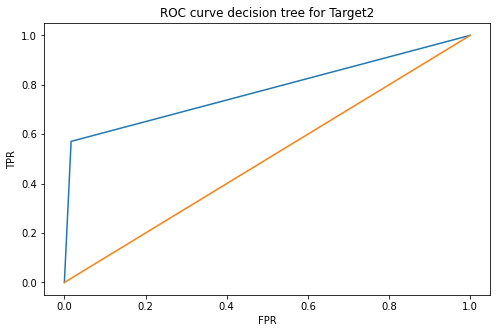

In [ ]:
fpr2, tpr2, _ = roc_curve(y2_test, y2_test_pred, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr2, tpr2)
plt.plot(fpr2, fpr2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve decision tree for Target2')
plt.show()

#### Случайный лес

In [ ]:
parametrs = dict(n_estimators = [20, 50, 100, 200],
                   max_depth = [3, 5, 7, 10, None])

clf_rf = RandomizedSearchCV(rf, parametrs, verbose=3, random_state=321)

search1_rf_model = clf_rf.fit(x2_train, y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ......max_depth=3, n_estimators=20;, score=0.914 total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ......max_depth=3, n_estimators=20;, score=0.914 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=3, n_estimators=20;, score=0.914 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ......max_depth=3, n_estimators=20;, score=0.914 total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=3, n_estimators=20;, score=0.914 total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=7, n_estimators=200;, score=0.918 total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=7, n_estimators=200;, score=0.917 total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=7, n_estimators=200;, score=0.919 total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=7, n_estimators=200;, score=0.918 total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=7, n_estimators=200;, score=0.918 total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ..max_depth=None, n_estimators=200;, score=0.940 total time= 3.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ..max_depth=None, n_estimators=200;, score=0.941 total time= 3.3min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ..max_depth=None, n_estimators=200;, score=0.941 total time= 3.3min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ..max_depth=None, n_estimators=200;, score=0.941 total time= 3.3min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ..max_depth=None, n_estimators=200;, score=0.940 total time= 3.4min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.914 total time=  36.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=5, n_estimators=100;, score=0.914 total time=  37.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=5, n_estimators=100;, score=0.914 total time=  37.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=5, n_estimators=100;, score=0.914 total time=  37.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=5, n_estimators=100;, score=0.914 total time=  37.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=5, n_estimators=200;, score=0.914 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=5, n_estimators=200;, score=0.914 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=5, n_estimators=200;, score=0.914 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=5, n_estimators=200;, score=0.914 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=5, n_estimators=200;, score=0.914 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.921 total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.920 total time=  30.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.921 total time=  30.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.922 total time=  31.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.921 total time=  30.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.914 total time=  25.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.914 total time=  26.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.914 total time=  25.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.914 total time=  25.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.914 total time=  26.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ....max_depth=10, n_estimators=200;, score=0.921 total time= 2.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ....max_depth=10, n_estimators=200;, score=0.921 total time= 2.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ....max_depth=10, n_estimators=200;, score=0.922 total time= 2.6min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ....max_depth=10, n_estimators=200;, score=0.920 total time= 2.2min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ....max_depth=10, n_estimators=200;, score=0.921 total time= 2.7min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.914 total time=  14.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.914 total time=  14.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.914 total time=  14.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.914 total time=  14.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=3, n_estimators=50;, score=0.914 total time=  14.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=10, n_estimators=20;, score=0.921 total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=10, n_estimators=20;, score=0.919 total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=10, n_estimators=20;, score=0.921 total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=10, n_estimators=20;, score=0.920 total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=10, n_estimators=20;, score=0.920 total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
search1_rf_model.cv_results_

{'mean_fit_time': array([  5.57378287,  92.21145549, 188.90065203,  35.951687  ,
         71.47251048,  30.02938147,  24.70511618, 143.44125652,
         13.64005513,  13.18771911]),
 'mean_score_time': array([0.21725454, 2.63173757, 9.74782214, 1.12672553, 2.2223825 ,
        0.88065681, 0.92519617, 3.45430241, 0.48655095, 0.36861324]),
 'mean_test_score': array([0.91398063, 0.91779025, 0.94071464, 0.91399803, 0.91398063,
        0.92105046, 0.91398063, 0.9208765 , 0.91398063, 0.91998208]),
 'param_max_depth': masked_array(data=[3, 7, None, 5, 5, 10, 3, 10, 3, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[20, 200, 200, 100, 200, 50, 100, 200, 50, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [

In [ ]:
search1_rf_model.best_params_

{'max_depth': None, 'n_estimators': 200}

In [ ]:
search1_rf_model.best_score_

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 200, 
                                max_depth = None,
                                max_features = 'auto',
                                random_state = 321)
rf2 = rf2.fit(x1_train, y2_train)

y2_train_pred_rf = rf2.predict(x1_train)
y2_test_pred_rf = rf2.predict(x1_test)

prob2_train_rf = rf2.predict_proba(x1_train)[:, 1]
prob2_test_rf = rf2.predict_proba(x1_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
print("f1 score for train: ", f1_score(y2_train, y2_train_pred_rf))
print("f1 score for test: ", f1_score(y2_test, y2_test_pred_rf))
print("roc_auc_score for train: ", roc_auc_score(y2_train, prob2_train_rf))
print("roc_auc_score for test: ", roc_auc_score(y2_test, prob2_test_rf))

f1 score for train:  0.9999831476769072
f1 score for test:  0.5590650663297536
roc_auc_score for train:  0.9999999999198137
roc_auc_score for test:  0.9490348921208451


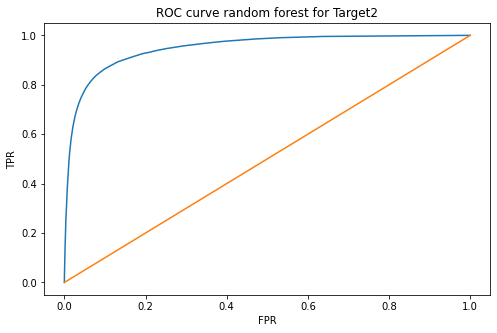

In [ ]:
fpr2_rf, tpr2_rf, _ = roc_curve(y2_test, prob2_test_rf, drop_intermediate=False)

plt.figure(figsize=(8, 5))
plt.clf()
plt.plot(fpr2_rf, tpr2_rf)
plt.plot(fpr2_rf, fpr2_rf)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve random forest for Target2')
plt.show()

#### XGboost

Алгоритм подбора гиперпараметров следующий:

Выбираем относительно большой learning_rate (η ∈ [0.05, 0.3]), подбираем оптимальное число деревьев для выбранного η

Настраиваем параметры деревьев, начиная с самых значимых (max_depth, min_child_weight, gamma, subsample, colsample_bytree)

Настраиваем регуляризации ( λ , α )

Уменьшаем learning_rate, пропорционально увеличиваем число деревьев

In [14]:
xgb1 = XGBClassifier(
        learning_rate=0.1,
        n_estimators=150,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


F1-score : 0.6916
AUC Score (Train): 0.971709
AUC Score (Test): 0.970687


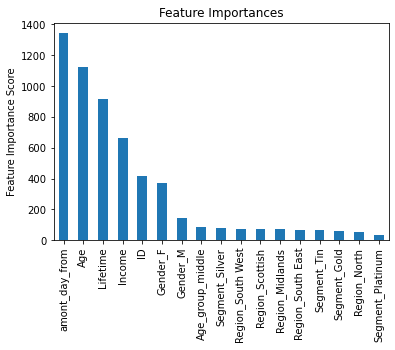

In [15]:
modelfit(xgb1, x2_train, x2_test, y2_train, y2_test)

Перебираем max_depth и min_child_weight по сетке.

In [16]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150,
                                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(x2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
     

In [17]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9740647511710894)

Уточняем предсказание

In [18]:
param_test2 = {
    'max_depth':[8, 9, 10],
    'min_child_weight':[2, 3, 1]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, 
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(x2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
     

In [19]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 10, 'min_child_weight': 1}, 0.9748854629021082)

Мы видим, что гридсёрч выдаёт максимальное значение max_depth, которое мы ему даём. Попробуем поставить больше.

In [20]:
param_test2 = {
    'max_depth':[10, 12, 15],
    'min_child_weight':[1]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, 
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(x2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
     

In [21]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_child_weight': 1}, 0.9784037622991898)

Мы подобрали max_depth и min_child_weight - дальше будем использовать подобранные значения параметров. Подберем по сетке параметр gamma на отрезке от 0 до 1.

In [22]:
param_test3 = {
    'gamma': np.arange(0.0, 1.1, 0.1)
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=15,
                         min_child_weight = 1, objective='binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                         param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(x2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=15,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
          

In [23]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 1.0}, 0.9786193082293225)

Подберем по сетке параметры subsample и colsample_bytree. Используем значения этих параметров: [0.6,0.7,0.8,0.9,1.]

In [24]:
param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
} 

gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=15,
                                                   min_child_weight = 1, objective= 'binary:logistic', gamma=1, nthread=4, scale_pos_weight=1,seed=27), 
                         param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(x2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=1, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=15,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
             

In [25]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.9810272405765254)

Подберем параметр регуляризации reg_alpha. Попробуем [1e-5, 1e-2, 0.1, 1, 100]

In [28]:
param_test5 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
} 

gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=15,
                                                   min_child_weight = 1, objective='binary:logistic', nthread=4, gamma=1, scale_pos_weight=1,seed=27,
                                                  subsample = 0.9, colsample_bytree = 0.6),
                         param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(x2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=1, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=15,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
              

In [29]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 0.01}, 0.9810238750865835)

Запустим обучение и предсказание на найденных параметрах и посмотрим на качество.

D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


F1-score : 0.8586
AUC Score (Train): 0.992898
AUC Score (Test): 0.981279


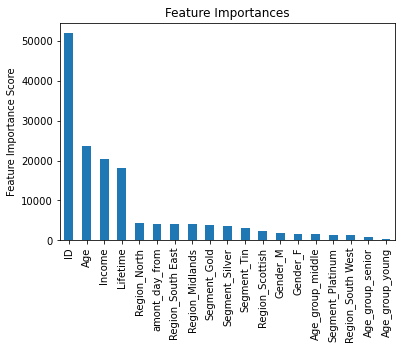

In [30]:
xgb3 = XGBClassifier(
        learning_rate=0.1,     
        n_estimators=150,   
        max_depth=15,
        min_child_weight=1,
        gamma=0.9,
        subsample=0.9,
        colsample_bytree=0.6,
        reg_alpha=0.01,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb3, x2_train, x2_test, y2_train, y2_test)